In [1]:
import numpy as np
import pandas as pd
from plotnine import *

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load data
PATH_OUTPUT_MSI = "../../../../data/sentinel2MsiL2/_out01/sentinel2MsiL2_out01_001_2.parquet"
df_sentinel2MsiL2_out01_001_2 = pd.read_parquet(PATH_OUTPUT_MSI)
print(df_sentinel2MsiL2_out01_001_2.shape)
print(f"unique satellite dates {df_sentinel2MsiL2_out01_001_2['PixelTime'].unique().shape} from "
      f"{df_sentinel2MsiL2_out01_001_2['PixelTime'].min()} to "
      f"{df_sentinel2MsiL2_out01_001_2['PixelTime'].max()}")
df_sentinel2MsiL2_out01_001_2.head(3)

(1500, 62)
unique satellite dates (60,) from 2023-05-01 09:30:31 to 2023-09-28 09:30:31


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason,QualitySceneClassificationName,PixelTimeUtc,Cluster
0,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
1,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
2,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7


In [3]:
# groupby ?
df_sentinel2MsiL2_out01_002_0 = (df_sentinel2MsiL2_out01_001_2
                                 .filter(items=['PixelTime', 'PixelTimeUtc', 'Cluster', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11'])
                                 .assign(B1 = lambda e: e['B1'].apply(float))
                                 .assign(B2 = lambda e: e['B2'].apply(float))
                                 .assign(B3 = lambda e: e['B3'].apply(float))
                                 .assign(B4 = lambda e: e['B4'].apply(float))
                                 .assign(B5 = lambda e: e['B5'].apply(float))
                                 .assign(B6 = lambda e: e['B6'].apply(float))
                                 .assign(B7 = lambda e: e['B7'].apply(float))
                                 .assign(B8 = lambda e: e['B8'].apply(float))
                                 .assign(B8A = lambda e: e['B8A'].apply(float))
                                 .assign(B9 = lambda e: e['B9'].apply(float))
                                 .assign(B11 = lambda e: e['B11'].apply(float))
                                 #.groupby(['PixelTime', 'PixelTimeUtc', 'Cluster'])
                                 #.mean()
                                 )
print(df_sentinel2MsiL2_out01_002_0.shape)
print(f"unique satellite dates {df_sentinel2MsiL2_out01_002_0['PixelTime'].unique().shape} from "
      f"{df_sentinel2MsiL2_out01_002_0['PixelTime'].min()} to "
      f"{df_sentinel2MsiL2_out01_002_0['PixelTime'].max()}")
df_sentinel2MsiL2_out01_002_0.head(3)

(1500, 14)
unique satellite dates (60,) from 2023-05-01 09:30:31 to 2023-09-28 09:30:31


,PixelTime,PixelTimeUtc,Cluster,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11
0,2023-05-01 09:30:31,1682933431,7,0.5524,0.5000,0.4744,0.4500,0.4702,0.4796,0.4832,0.5016,0.4732,0.6136,0.2653
1,2023-05-01 09:30:31,1682933431,7,0.5524,0.5084,0.4752,0.4476,0.4681,0.4774,0.4776,0.5060,0.4712,0.6136,0.2636
2,2023-05-01 09:30:31,1682933431,7,0.5524,0.5136,0.4752,0.4468,0.4627,0.4732,0.4722,0.5084,0.4696,0.6136,0.2626


In [4]:
PATH_OUTPUT_HYP_SPECTRAL_CONV = "../../../../data/hypernetsLJaesL2A/_out01/hypernetsLJaesL2A_out01_002_0.parquet"
df_hypernetsLJaesL2A_out01_002_0 = pd.read_parquet(PATH_OUTPUT_HYP_SPECTRAL_CONV)
print(df_hypernetsLJaesL2A_out01_002_0.shape)
print(f"unique in-situ dates {df_hypernetsLJaesL2A_out01_002_0['utc_dt'].unique().shape} from "
      f"{df_hypernetsLJaesL2A_out01_002_0['utc_dt'].min()} to "
      f"{df_hypernetsLJaesL2A_out01_002_0['utc_dt'].max()}")
df_hypernetsLJaesL2A_out01_002_0.head(5)

(1905, 25)
unique in-situ dates (1885,) from 2023.05.01 07:02:24 to 2023.08.31 15:34:24


,utc_,viewing_azimuth_angle_,viewing_zenith_angle_,B1,B2,B3,B4,B5,B6,B7,...,utc_minus_1u,utc_plus_1u,utc_minus_1u_dt,utc_plus_1u_dt,utc_minus_2u,utc_plus_2u,utc_minus_3u,utc_plus_3u,utc_minus_4u,utc_plus_4u
0,1686584064,293,30,0.003088,0.003402,0.007357,0.002229,0.010125,0.068818,0.094357,...,1686580464,1686587664,2023.06.12 14:34:24,2023.06.12 16:34:24,1686576864,1686591264,1686573264,1686594864,1686566064,1686602064
1,1692866048,293,30,0.006597,0.008938,0.020109,0.009941,0.033847,0.173287,0.231642,...,1692862448,1692869648,2023.08.24 07:34:08,2023.08.24 09:34:08,1692858848,1692873248,1692855248,1692876848,1692848048,1692884048
2,1691820160,293,30,0.012875,0.018907,0.044951,0.022655,0.077591,0.325047,0.415350,...,1691816560,1691823760,2023.08.12 05:02:40,2023.08.12 07:02:40,1691812960,1691827360,1691809360,1691830960,1691802160,1691838160
3,1686574976,293,30,0.006930,0.009286,0.024639,0.010054,0.044813,0.210397,0.267029,...,1686571376,1686578576,2023.06.12 12:02:56,2023.06.12 14:02:56,1686567776,1686582176,1686564176,1686585776,1686556976,1686592976
4,1688209408,293,30,0.005797,0.007640,0.018143,0.007408,0.028518,0.143921,0.190982,...,1688205808,1688213008,2023.07.01 10:03:28,2023.07.01 12:03:28,1688202208,1688216608,1688198608,1688220208,1688191408,1688227408


In [5]:
# In time alignment: window 1h

# Create IntervalIndex from 'utc_minus_1h' and 'utc_plus_1h'
intervals = pd.IntervalIndex.from_arrays(df_hypernetsLJaesL2A_out01_002_0['utc_minus_1u'], df_hypernetsLJaesL2A_out01_002_0['utc_plus_1u'], closed='both')

# Find the first interval each value in 'utc_' falls into
def find_first_interval(timestamp):
    contained = intervals.contains(timestamp)
    if contained.any():
        return contained.argmax()
    return None

# Find interval for each value in 'utc_'
df_sentinel2MsiL2_out01_002_0['interval_idx'] = df_sentinel2MsiL2_out01_002_0['PixelTimeUtc'].apply(find_first_interval)

# Drop rows with no matching interval
df_sentinel2MsiL2_out01_002_0.dropna(subset=['interval_idx'], inplace=True)

# Merge based on the interval index
df_sentinel2MsiL2_out01_002_0 = (df_sentinel2MsiL2_out01_002_0
                                 .merge(df_hypernetsLJaesL2A_out01_002_0, left_on='interval_idx', right_index=True, how='left')
                                 .drop('interval_idx', axis=1))
df_sentinel2MsiL2_out01_002_0 = (df_sentinel2MsiL2_out01_002_0
                                 .filter(items=['PixelTime', 'utc_dt', 'utc_minus_1u_dt', 'utc_plus_1u_dt', 'Cluster',
                                                'B1_x', 'B2_x', 'B3_x', 'B4_x', 'B5_x', 'B6_x', 'B7_x', 'B8_x', 'B8A_x', 'B9_x', 'B11_x',
                                                'B1_y', 'B2_y', 'B3_y', 'B4_y', 'B5_y', 'B6_y', 'B7_y', 'B8_y', 'B8A_y', 'B9_y', 'B11_y',
                                                ]))
print(df_sentinel2MsiL2_out01_002_0.shape)
print(f"unique satellite dates {df_sentinel2MsiL2_out01_002_0['PixelTime'].unique().shape} from "
      f"{df_sentinel2MsiL2_out01_002_0['PixelTime'].min()} to "
      f"{df_sentinel2MsiL2_out01_002_0['PixelTime'].max()}")
print(f"unique in-situ dates {df_sentinel2MsiL2_out01_002_0['utc_dt'].unique().shape} from "
      f"{df_sentinel2MsiL2_out01_002_0['utc_dt'].min()} to "
      f"{df_sentinel2MsiL2_out01_002_0['utc_dt'].max()}")
df_sentinel2MsiL2_out01_002_0.head(10)

(1025, 27)
unique satellite dates (41,) from 2023-05-01 09:30:31 to 2023-08-29 09:30:41
unique in-situ dates (41,) from 2023.05.01 09:04:00 to 2023.08.29 10:03:44


,PixelTime,utc_dt,utc_minus_1u_dt,utc_plus_1u_dt,Cluster,B1_x,B2_x,B3_x,B4_x,B5_x,...,B2_y,B3_y,B4_y,B5_y,B6_y,B7_y,B8_y,B8A_y,B9_y,B11_y
0,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5000,0.4744,0.4500,0.4702,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
1,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5084,0.4752,0.4476,0.4681,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
2,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5136,0.4752,0.4468,0.4627,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
3,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5451,0.5132,0.4764,0.4416,0.4550,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
4,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5451,0.5180,0.4724,0.4344,0.4485,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
5,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5040,0.4668,0.4444,0.4624,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
6,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5200,0.4772,0.4476,0.4691,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
7,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5272,0.4776,0.4492,0.4722,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
8,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5451,0.5120,0.4772,0.4536,0.4673,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
9,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5451,0.5180,0.4848,0.4440,0.4600,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201


In [6]:
PATH_OUTPUT = "../../../../data/sentinel2MsiL2/_out01/sentinel2MsiL2_out01_002_0.parquet"
df_sentinel2MsiL2_out01_002_0.to_parquet(PATH_OUTPUT, index=True)
print(df_sentinel2MsiL2_out01_002_0.shape)
pd.read_parquet(PATH_OUTPUT).head(3)

(1025, 27)


,PixelTime,utc_dt,utc_minus_1u_dt,utc_plus_1u_dt,Cluster,B1_x,B2_x,B3_x,B4_x,B5_x,...,B2_y,B3_y,B4_y,B5_y,B6_y,B7_y,B8_y,B8A_y,B9_y,B11_y
0,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5000,0.4744,0.4500,0.4702,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
1,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5084,0.4752,0.4476,0.4681,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201
2,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,0.5524,0.5136,0.4752,0.4468,0.4627,...,0.023658,0.055196,0.032056,0.101359,0.291665,0.344272,0.366604,0.378752,0.380082,0.13201


In [14]:
# Melt data for plotting
df_sentinel2MsiL2_out01_002_1 = df_sentinel2MsiL2_out01_002_0.copy()
df_sentinel2MsiL2_out01_002_1['RowNumber'] = range(1, len(df_sentinel2MsiL2_out01_002_1)+1)
df_sentinel2MsiL2_out01_002_1 = (pd.melt(df_sentinel2MsiL2_out01_002_1, 
                                         id_vars=['RowNumber', 'PixelTime', 'utc_dt', 'utc_minus_1u_dt', 'utc_plus_1u_dt', 'Cluster'], 
                                         var_name='Band', value_name='reflectance')
                                 .assign(Source = lambda e: e['Band'].str[-2:])
                                 .assign(Source = lambda e: np.where(e['Source'] == '_x', 'sentinel2MsiL2', 'in-situ'))
                                 .assign(Band = lambda e: e['Band'].str.replace('_x', '').str.replace('_y', ''))
                                 .assign(RowID = lambda e: e['Band'] + '-' + e['RowNumber'].apply(str))
                                 .assign(reflectance = lambda e: e['reflectance'].apply(str).apply(float))
                                 )
df_sentinel2MsiL2_out01_002_1_sat = df_sentinel2MsiL2_out01_002_1.query("Source == 'sentinel2MsiL2'")
df_sentinel2MsiL2_out01_002_1_insitu = df_sentinel2MsiL2_out01_002_1.query("Source == 'in-situ'")
df_sentinel2MsiL2_out01_002_2 = (pd.merge(
    df_sentinel2MsiL2_out01_002_1_sat, 
    df_sentinel2MsiL2_out01_002_1_insitu.filter(items=['RowID', 'reflectance']),
    on='RowID', how='inner')
)
df_sentinel2MsiL2_out01_002_2#.head(3)

,RowNumber,PixelTime,utc_dt,utc_minus_1u_dt,utc_plus_1u_dt,Cluster,Band,reflectance_x,Source,RowID,reflectance_y
0,1,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-1,0.017653
1,2,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-2,0.017653
2,3,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-3,0.017653
3,4,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5451,sentinel2MsiL2,B1-4,0.017653
4,5,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5451,sentinel2MsiL2,B1-5,0.017653
...,...,...,...,...,...,...,...,...,...,...,...
11270,1021,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2197,sentinel2MsiL2,B11-1021,0.098000
11271,1022,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2285,sentinel2MsiL2,B11-1022,0.098000
11272,1023,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2330,sentinel2MsiL2,B11-1023,0.098000
11273,1024,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2249,sentinel2MsiL2,B11-1024,0.098000


In [22]:
# Calculate pearson correlation and create 'label' for plot
df_grouped = (df_sentinel2MsiL2_out01_002_2.filter(items=['Cluster', 'Band', 'reflectance_x', 'reflectance_y'])
              .groupby(['Cluster','Band'])
              ).apply(lambda x: x['reflectance_x'].corr(x['reflectance_y'])).reset_index()
df_grouped = (df_grouped
              .assign(Correlation = lambda e: e[0])
              .filter(items=['Cluster', 'Band', 'Correlation'])
              )
df_sentinel2MsiL2_out01_002_3 = (pd.merge(df_sentinel2MsiL2_out01_002_2, df_grouped, on=['Cluster', 'Band'], how='left')
                                 .assign(Label = lambda e: e['Cluster'].apply(lambda x: f"C{str(x).zfill(2)}")
                                                                                        + '-' + e['Band']
                                                                                        + ', (' + e['Correlation'].apply(lambda y: str(np.round(y,3))
                                                                                        + ')'
                                                                              ))
                                 )
df_sentinel2MsiL2_out01_002_3#.head(3)

,RowNumber,PixelTime,utc_dt,utc_minus_1u_dt,utc_plus_1u_dt,Cluster,Band,reflectance_x,Source,RowID,reflectance_y,Correlation,Label
0,1,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-1,0.017653,0.709817,"C07-B1, (0.71)"
1,2,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-2,0.017653,0.709817,"C07-B1, (0.71)"
2,3,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5524,sentinel2MsiL2,B1-3,0.017653,0.709817,"C07-B1, (0.71)"
3,4,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5451,sentinel2MsiL2,B1-4,0.017653,0.709817,"C07-B1, (0.71)"
4,5,2023-05-01 09:30:31,2023.05.01 09:04:00,2023.05.01 08:04:00,2023.05.01 10:04:00,7,B1,0.5451,sentinel2MsiL2,B1-5,0.017653,0.709817,"C07-B1, (0.71)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,1021,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2197,sentinel2MsiL2,B11-1021,0.098000,-0.304192,"C00-B11, (-0.304)"
11271,1022,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2285,sentinel2MsiL2,B11-1022,0.098000,-0.304192,"C00-B11, (-0.304)"
11272,1023,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2330,sentinel2MsiL2,B11-1023,0.098000,-0.304192,"C00-B11, (-0.304)"
11273,1024,2023-05-31 09:30:41,2023.05.31 08:34:08,2023.05.31 07:34:08,2023.05.31 09:34:08,0,B11,0.2249,sentinel2MsiL2,B11-1024,0.098000,-0.304192,"C00-B11, (-0.304)"


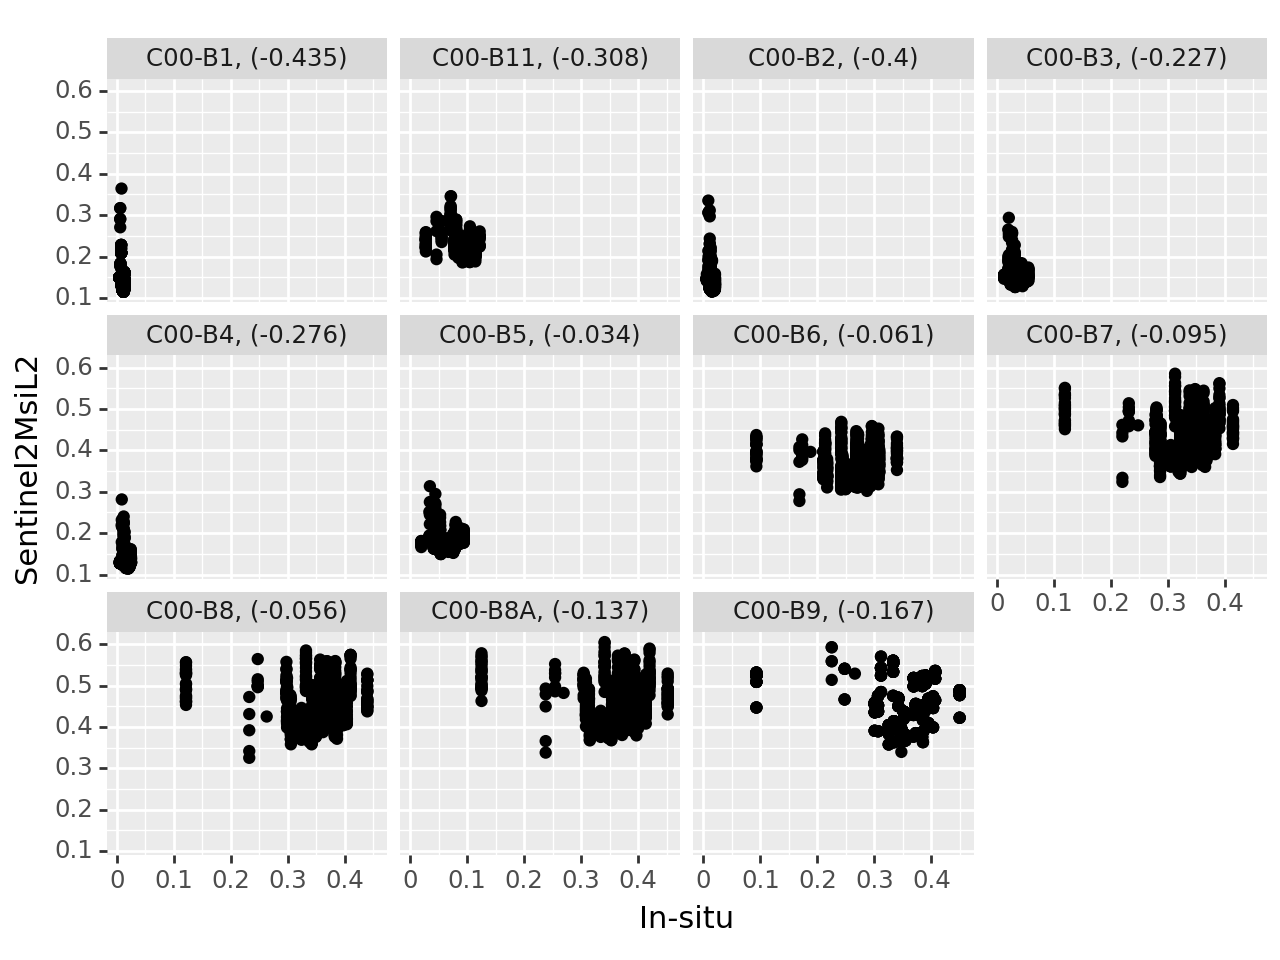

In [19]:
# Draw plots
# Select only cluster related to Vegetation. !!! Adjust based on clustering result
cluster = 0
df = df_sentinel2MsiL2_out01_002_3.query(f"Cluster == {cluster}")
p = (
    ggplot(df, aes(x='reflectance_y', y='reflectance_x'))
    + geom_point()
    #+ geom_abline(intercept=0, slope=1, linetype='dashed')  # 45-degree dashed line
    + facet_wrap('~Label')
    #+ theme_minimal()
    + labs(y='Sentinel2MsiL2', x='In-situ')
    #+ theme(legend_title=element_blank())
    #+ scale_x_log10()
    #+ scale_y_log10()
)
p.draw()

In [85]:
BANDS = { 'B1':'B01', 'B2':'B02', 'B3':'B03', 'B4':'B04', 'B5':'B05', 'B6':'B06', 'B7':'B07', 'B8':'B08', 'B8A':'B08A', 'B9':'B09', 'B11':'B11' }
BANDS_NUM = { 'B1':1, 'B2':2, 'B3':3, 'B4':4, 'B5':5, 'B6':6, 'B7':7, 'B8':8, 'B8A':9, 'B9':10, 'B11':11 }

df_concatenated = (pd.concat([df_sentinel2MsiL2_out01_002_1_sat, df_sentinel2MsiL2_out01_002_1_insitu])
                   .query('Cluster == 0')
                   .assign(YearMonth = lambda e: (pd.to_datetime(e['PixelTime']).dt.strftime('%Y%m').astype(int)))
                   .assign(Date_ = lambda e: pd.to_datetime(e['PixelTime']).dt.date)
                   .assign(Band_ = lambda e: e['Band'].replace(BANDS))
                   .assign(BandNum = lambda e: e['Band'].replace(BANDS_NUM))
                   .filter(items = ['YearMonth', 'Date_', 'Cluster', 'Band', 'Band_', 'BandNum', 'reflectance', 'Source'])
                   .groupby(['YearMonth', 'Date_', 'Cluster', 'Band', 'Band_', 'BandNum', 'Source'])['reflectance'].agg(['mean', 'std']).reset_index()
                   )
df_concatenated.head(3)


,YearMonth,Date_,Cluster,Band,Band_,BandNum,Source,mean,std
0,202305,2023-05-04,0,B1,B01,1,in-situ,0.013495,0.000000
1,202305,2023-05-04,0,B1,B01,1,sentinel2MsiL2,0.159843,0.001954
2,202305,2023-05-04,0,B11,B11,11,in-situ,0.104971,0.000000


In [94]:
def get_comparison_plot(df):
    p = (ggplot(df, aes(x='BandNum', y='mean', color='Source'))
                    #+ geom_ribbon(aes(ymin='mean-std*2', ymax='mean+std*2'), fill='lightgrey')
                    + geom_line()
                    + facet_wrap("~Date_", ncol=4)
                    + scale_x_continuous(breaks=np.arange(1, 12, 1))
                    #+ scale_y_continuous(breaks=np.arange(0, 2.1, 0.2))
                    + xlab("Band")
                    + ylab("Reflectance")
                    + theme(
                        axis_text_x=element_text(size=7, rotation=90),
                        axis_text_y=element_text(size=7),
                        strip_text=element_text(size=7),
                        legend_position="bottom"
                    )
                    + labs(color='')
            )
    return p

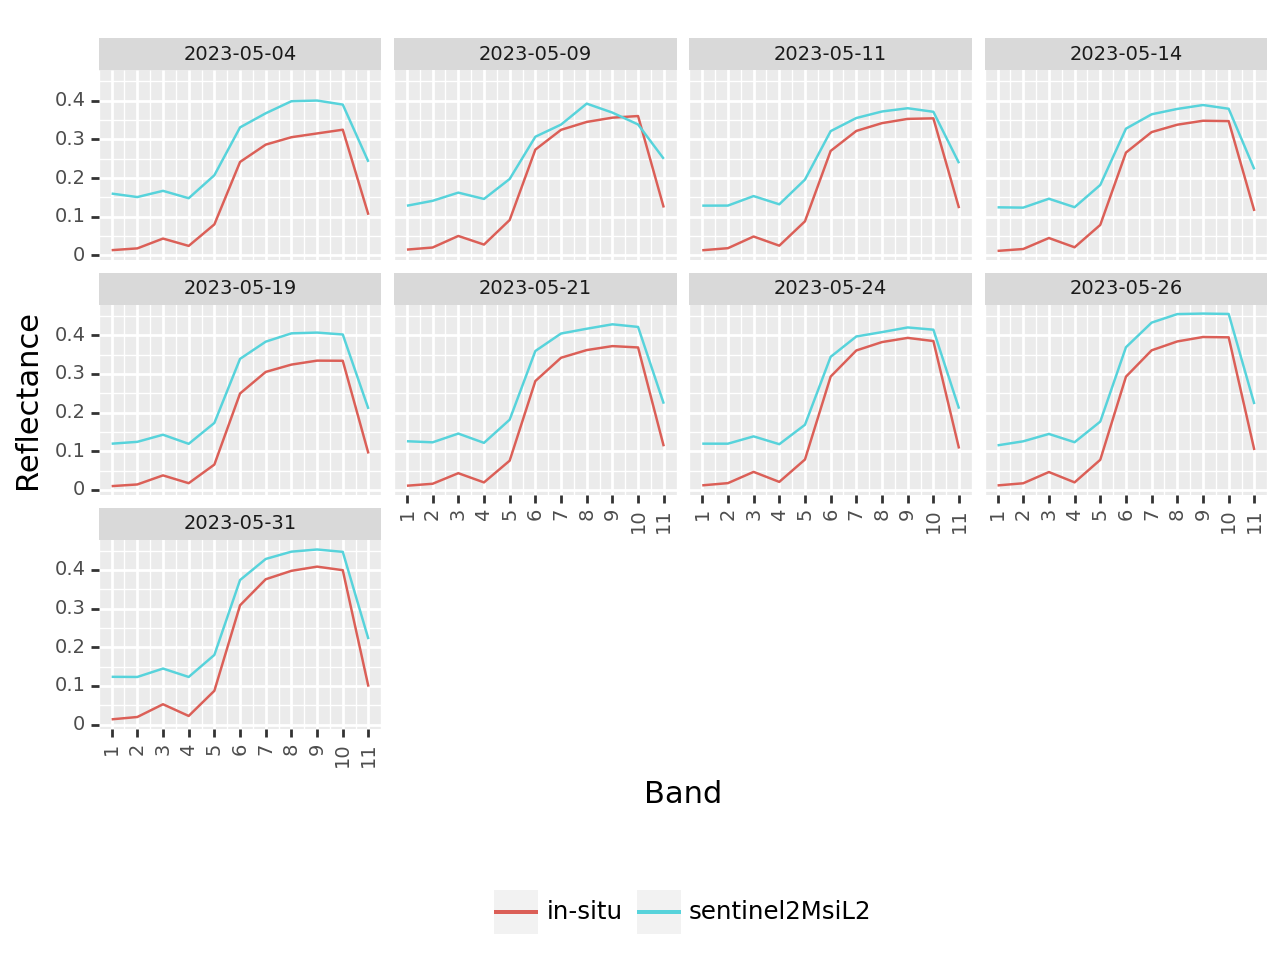

In [95]:
get_comparison_plot(df_concatenated.query("YearMonth == 202305")).draw()

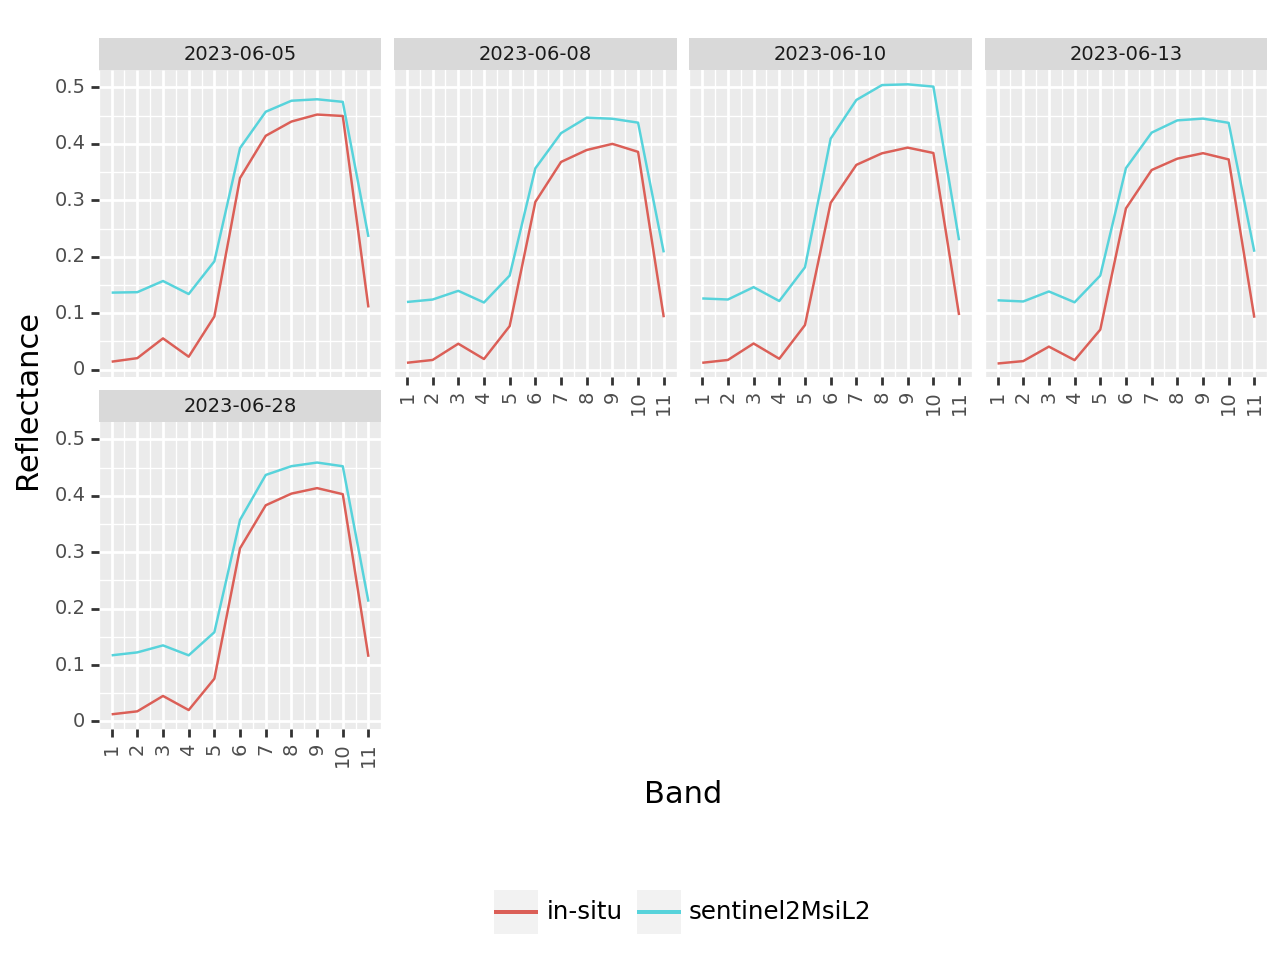

In [96]:
get_comparison_plot(df_concatenated.query("YearMonth == 202306")).draw()

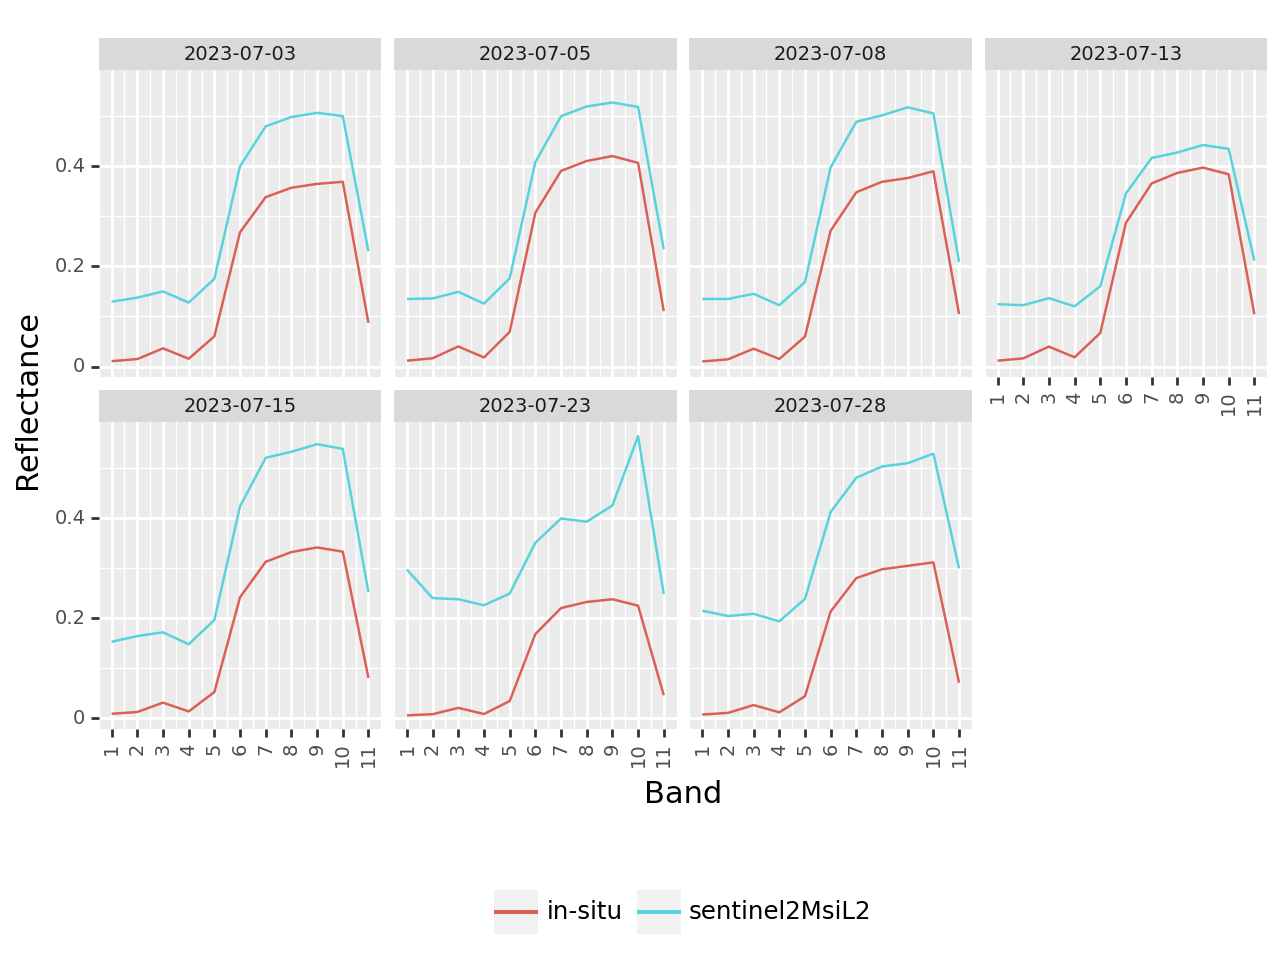

In [97]:
get_comparison_plot(df_concatenated.query("YearMonth == 202307")).draw()

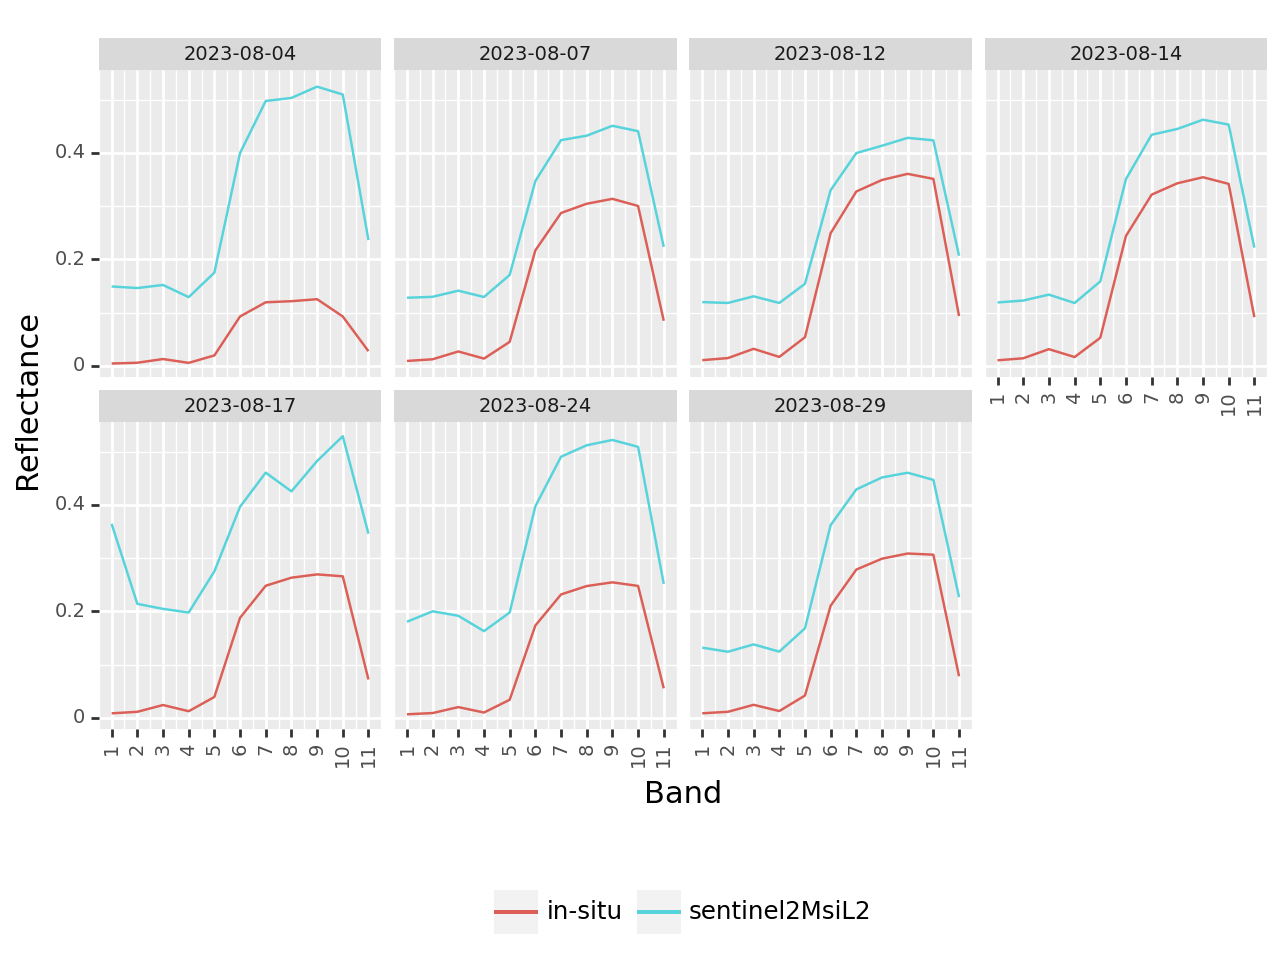

In [98]:
get_comparison_plot(df_concatenated.query("YearMonth == 202308")).draw()